<a href="https://colab.research.google.com/github/SGRGit/gwOsc/blob/Main/DataPrepBlipGlitches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [206]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [0]:
import sys
sys.path.append('/content/gdrive/My Drive/Colab Notebooks')

In [0]:
import os, sys
from google.colab import drive
drive.mount('/content/gdrive')
nb_path = '/content/notebooks'
os.symlink('/content/gdrive/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0,nb_path)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!pip install --target=$nb_path gwpy --upgrade

  Using cached https://files.pythonhosted.org/packages/2d/e6/14f8cefc3ebd73e062323ed94ecc2ea943b3ab69137b2b9fc9df4087a9bc/gwpy-0.15.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/d6/9e/616124723b7a8f2a5399f9288b056bb31f37222b0b7cae46f6bafaa42154/gwdatafind-1.0.4-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/0e/46/ae6773894f7eacf53308086287897ec568eac9768918d913d5b9d366c5db/numpy-1.17.3-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/6d/ff/67426ce11f9f3432e020f5d5ef796e1d8e1c2a76b555c8705177f4347f99/gwosc-0.4.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/60/06/cafdd44889200e5438b897388f3075b52a8ef01f28a17366d91de0fa2d05/h5py-2.10.0-cp36-cp36m-manylinux1_x86_64.whl
Processing /root/.cache/pip/wheels/5d/1e/4a/ab4122baed7d67f6abce65b2b12049d3bc7fe5dad24edf89df/ligo_segments-1.2.0-cp36-cp36m-linux_x86_64.whl
  Using cached https://files.pythonhosted.org/packag

In [0]:
import gwpy

In [194]:
from gwpy.time import tconvert
print(tconvert(1133090460))

2015-12-02 11:20:43


In [0]:
from gwpy.timeseries import TimeSeries
data = TimeSeries.fetch_open_data('L1', 1133090460-1, 1133090460+1)

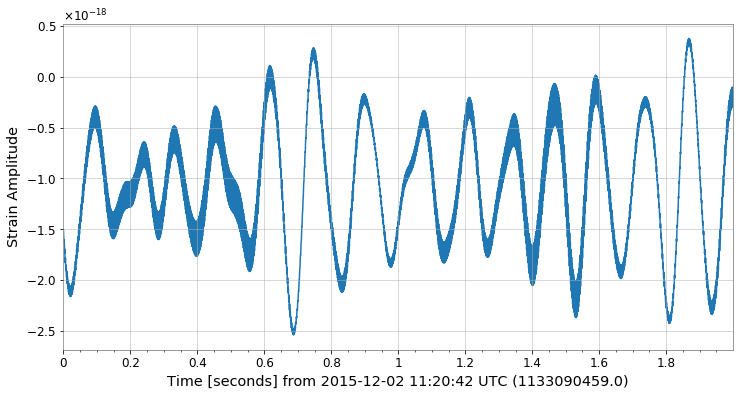

In [196]:
from gwpy.plot import Plot
plot = Plot(data)
ax = plot.gca()
ax.set_ylabel('Strain Amplitude')
plot.show()

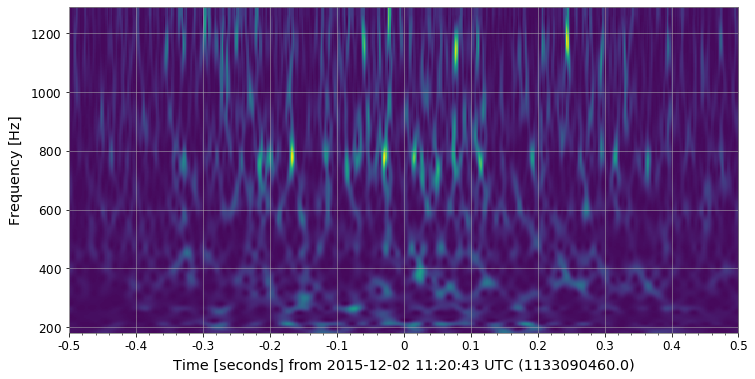

In [204]:
q = data.q_transform()
plot = q.plot()
ax = plot.gca()

ax.set_xlim(1133090460-0.5, 1133090460+0.5)
#ax.set_ylim(150, 800)

plot.show()

In [0]:
specgram = data.spectrogram(0.5, fftlength=0.5, overlap=.4) ** (1/2.)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  after removing the cwd from sys.path.


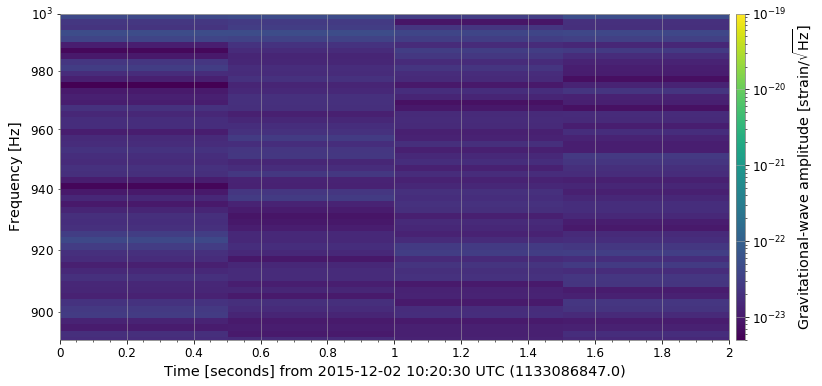

In [183]:
plot = specgram.imshow(norm='log', vmin=5e-24, vmax=1e-19)
ax = plot.gca()
ax.set_yscale('log')
ax.set_ylim(0, 1000)
ax.colorbar(label=r'Gravitational-wave amplitude [strain/$\sqrt{\mathrm{Hz}}$]')
plot.show()

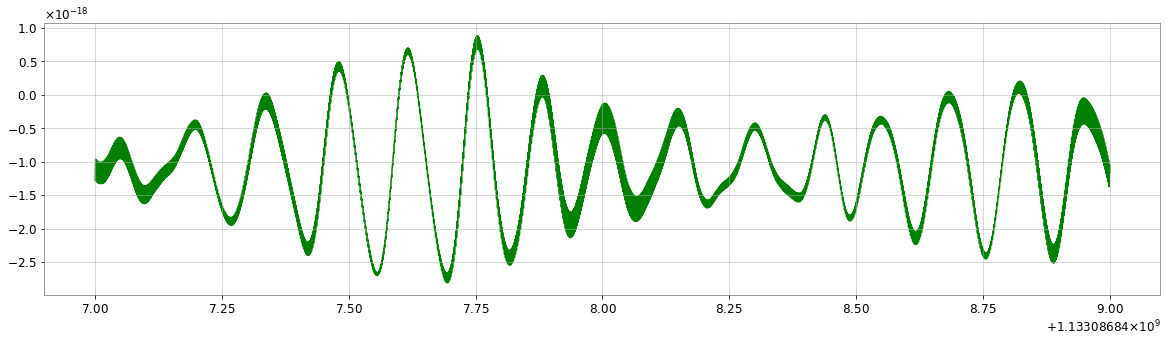

(0, 10)

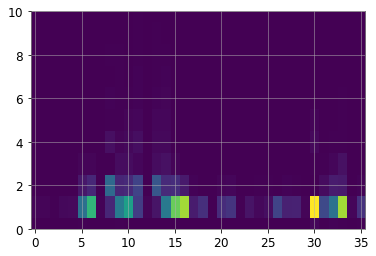

In [177]:
from scipy.fftpack import fft
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
fs = 5000

t_value = np.linspace(1133086847, 1133086849, num = np.array(xn).size)

def plot_source(signal, t):
  f, (ax) = plt.subplots(1, 1)
  f.set_figwidth(20)
  f.set_figheight(5)
  #ax1.plot(t, signal, 'r' , alpha=0.75)
  #ax2.plot(t, noise, 'b', alpha=0.75)
  ax.plot(t, signal, 'g')
  #ax.plot(t, signal, 'r', alpha=0.75)
  #ax3.title.set_text('Plot for Iteration %d' %i)
  plt.show()

  
def plot_spectrogram_sig(sig, fs):
  from scipy import signal
  freqs, times, spectrogram = signal.spectrogram(sig, fs)
  plt.imshow(spectrogram, aspect='auto')
  plt.ylim(10, 150)
  #plt.title('Spectrogram for Signal : Iteration %d' %a)
  #plt.savefig(os.path.join(seta_data_dir,'SPG for Signal%d'%a))
  #plt.close()
  
  
"""def plot_spectrogram_ns(noise, fs):
  from scipy import signal
  freqs, times, spectrogram = signal.spectrogram(noise, fs)
  plt.imshow(spectrogram, aspect='auto')
  plt.ylim(0, 25)
  plt.title('Spectrogram for Noise : Iteration %d' %a)
  plt.savefig(os.path.join(setb_data_dir,'SPG for Noise%d'%a))
  plt.close()"""


xn = TimeSeries.fetch_open_data('L1', 1133086848-1, 1133086848+1)
#plot_spectrogram_sig(xn, fs)
plot_source(np.array(xn), t_value)

freqs, times, spectrogram = signal.spectrogram(np.log(np.absolute(np.array(xn))), fs)
plt.imshow(spectrogram, aspect='auto')
plt.ylim(0, 10)

In [0]:
from gwpy.timeseries import TimeSeries
data = TimeSeries.fetch_open_data('L1', 1133090460-2, 1133090460+2)

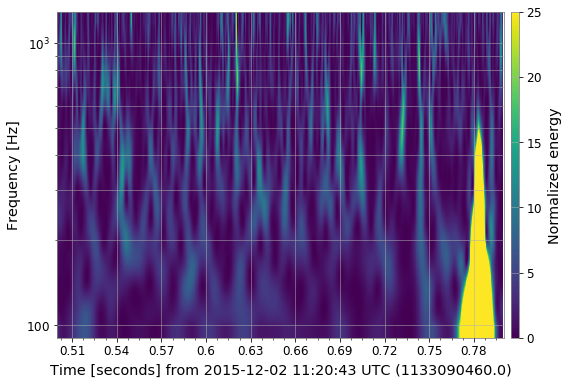

In [303]:
qtrans = data.q_transform(
    #whiten=False,  # already white
    #qrange=(4, 150),  # wider Q-transform range
    outseg=(1133090460.5, 1133090460.8),  # region of interest
)
plot = qtrans.imshow(figsize=[8, 6])
ax = plot.gca()
ax.set_xscale('seconds')
ax.set_yscale('log')
ax.set_epoch(1133090460)
#ax.set_ylim(20, 5000)
ax.set_ylabel('Frequency [Hz]')
ax.grid(True, axis='y', which='both')
ax.colorbar(cmap='viridis', label='Normalized energy', clim=[0, 25])
plot.show()